In [ ]:
setwd("/Users/rebecca/sudmant/analyses/myotis/analysis/exploratory/species_TE_proportion")

library(dplyr)
library(data.table)

myo_meta <- read.csv("/Users/rebecca/sudmant/analyses/myotis/data/myotis_meta.csv")

In [ ]:
for(i in seq_along(myo_meta$Abbr)) {
  
  ## Load in TE peak data
  peak_features <- fread(
    file.path("results/data", paste0(myo_meta$Abbr[i], "_peaks_TEs.tsv")),
    data.table = FALSE
  )
  
  df <- peak_features %>%
    dplyr::mutate(TE = ifelse(V11 == ".", FALSE, TRUE)) %>%
    dplyr::group_by(V4) %>%
    dplyr::reframe(
      TE = unique(TE),
    ) %>%
    dplyr::group_by(TE) %>%
    dplyr::reframe(No.Peaks = n()) %>%
    dplyr::mutate(Frac_Peaks = No.Peaks/sum(No.Peaks))
    
  perm_files <- list.files(path = "results/data/permutations", 
                           pattern = myo_meta$Abbr[i], 
                           full.names = TRUE)
  
  null_fracs <- lapply(seq_along(perm_files), function(j) {
    
    perm_peak_features <- fread(perm_files[j], data.table = FALSE)

    df_perm <- perm_peak_features %>%
      dplyr::mutate(TE = ifelse(V11 == ".", FALSE, TRUE)) %>%
      dplyr::group_by(V4) %>%
      dplyr::reframe(
        TE = unique(TE),
      ) %>%
      dplyr::group_by(TE) %>%
      dplyr::reframe(No.Peaks = n()) %>%
      dplyr::mutate(Frac_Peaks = No.Peaks/sum(No.Peaks)) %>%
      dplyr::filter(TE == TRUE)
      
      return(df$Frac_Peaks)
    
  })
  
}

In [11]:
  peak_features <- fread(
    file.path("results/data", paste0(myo_meta$Abbr[i], "_TEs_peaks.tsv")),
    data.table = FALSE
  )
  
  df <- peak_features %>%
    dplyr::mutate(TE = ifelse(V11 == ".", FALSE, TRUE)) %>%
    dplyr::group_by(V4) %>%
    dplyr::reframe(
      TE = unique(TE),
    ) %>%
    dplyr::group_by(TE) %>%
    dplyr::reframe(No.Peaks = n()) %>%
    dplyr::mutate(Frac_Peaks = No.Peaks/sum(No.Peaks))

In [6]:
null_fracs <- lapply(seq_along(perm_files), function(j) {
    
    perm_peak_features <- fread(perm_files[j], data.table = FALSE)

    df_perm <- perm_peak_features %>%
      dplyr::mutate(TE = ifelse(V11 == ".", FALSE, TRUE)) %>%
      dplyr::group_by(V4) %>%
      dplyr::reframe(
        TE = unique(TE),
      ) %>%
      dplyr::group_by(TE) %>%
      dplyr::reframe(No.Peaks = n()) %>%
      dplyr::mutate(Frac_Peaks = No.Peaks/sum(No.Peaks)) %>%
      dplyr::filter(TE == TRUE)
      
      return(df_perm$Frac_Peaks)
    
  })

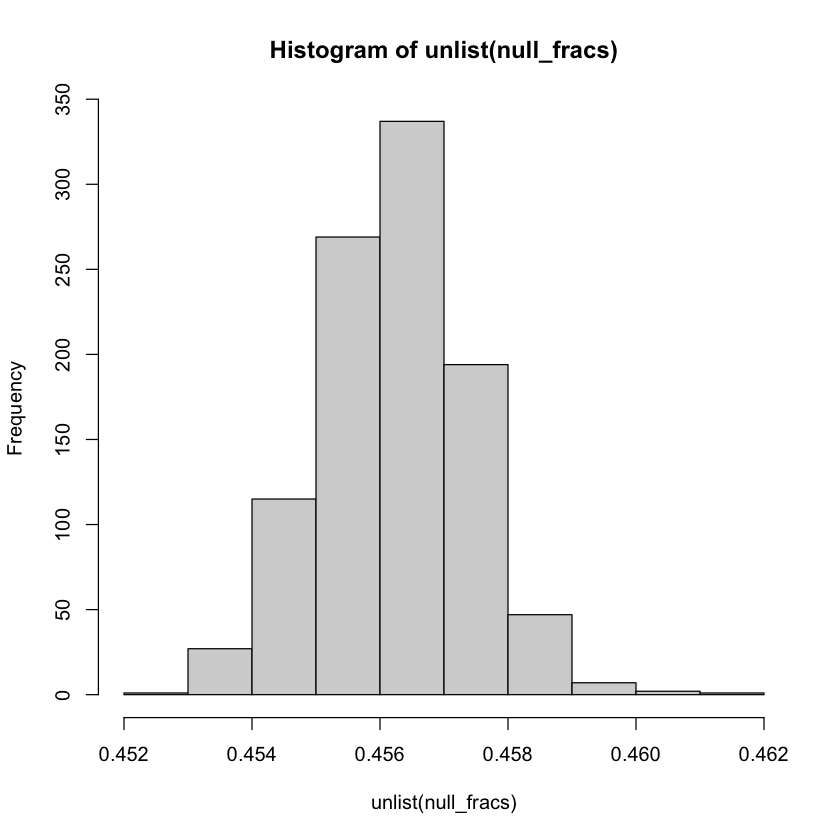

In [7]:
hist(unlist(null_fracs))

In [12]:
df

TE,No.Peaks,Frac_Peaks
<lgl>,<int>,<dbl>
FALSE,122706,0.6907683
TRUE,54931,0.3092317
